In [1]:
import sys
assert sys.version_info >= (3, 5)
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [2]:
import pandas as pd
DATA_PATH = "../data/union/End"
def load_data_prep(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "dataset_final.csv")
    return pd.read_csv(csv_path)
def load_data_demo(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "dataset_demog.csv")
    return pd.read_csv(csv_path)

In [3]:
# Cargar DataFrame
df = load_data_prep()
df_dem = load_data_demo()
df1 = df.merge(df_dem, on="cod", how="left")

In [16]:
df1.head(5)

,cod,afsl_ad,afsl_area_of_end_region_1,afsl_area_of_end_region_2,afsl_branch_volume,afsl_curl,afsl_diameter,afsl_dti_fa,afsl_elongation,afsl_irregularity,...,ufsr_rdi,ufsr_span,ufsr_total_area_of_end_regions,ufsr_total_radius_of_end_regions,ufsr_total_surface_area,ufsr_trunk_volume,ufsr_volume,label,age,gender
0,sub-10171,1.23721,1471.850,1248.580,11931.50,4.48975,16.4691,0.456258,7.18531,7.43516,...,0.330688,8.97232,2693.990,18.4475,21228.7,9877.95,14154.40,1,24,M
1,sub-10189,1.15361,2234.710,1009.630,8798.79,3.73118,15.0666,0.493506,6.87302,6.81786,...,0.151857,15.10740,2108.380,19.1517,19638.4,7918.42,11760.10,1,49,M
2,sub-10206,1.23390,478.866,827.487,1825.37,3.77463,11.9110,0.471517,6.58314,5.29834,...,0.176348,10.67070,933.249,17.1757,12013.7,2729.24,6178.25,1,21,M
3,sub-10217,1.18839,2978.960,1547.250,1441.49,3.34588,17.8728,0.463511,5.91539,7.33476,...,0.335666,9.68421,2180.850,17.1715,16714.3,10092.40,10799.40,1,33,F
4,sub-10225,1.23856,1581.530,683.534,7555.11,3.77320,15.7660,0.463871,6.37764,6.94917,...,0.444665,10.19450,691.368,24.4416,13561.0,1653.02,4666.25,1,35,M


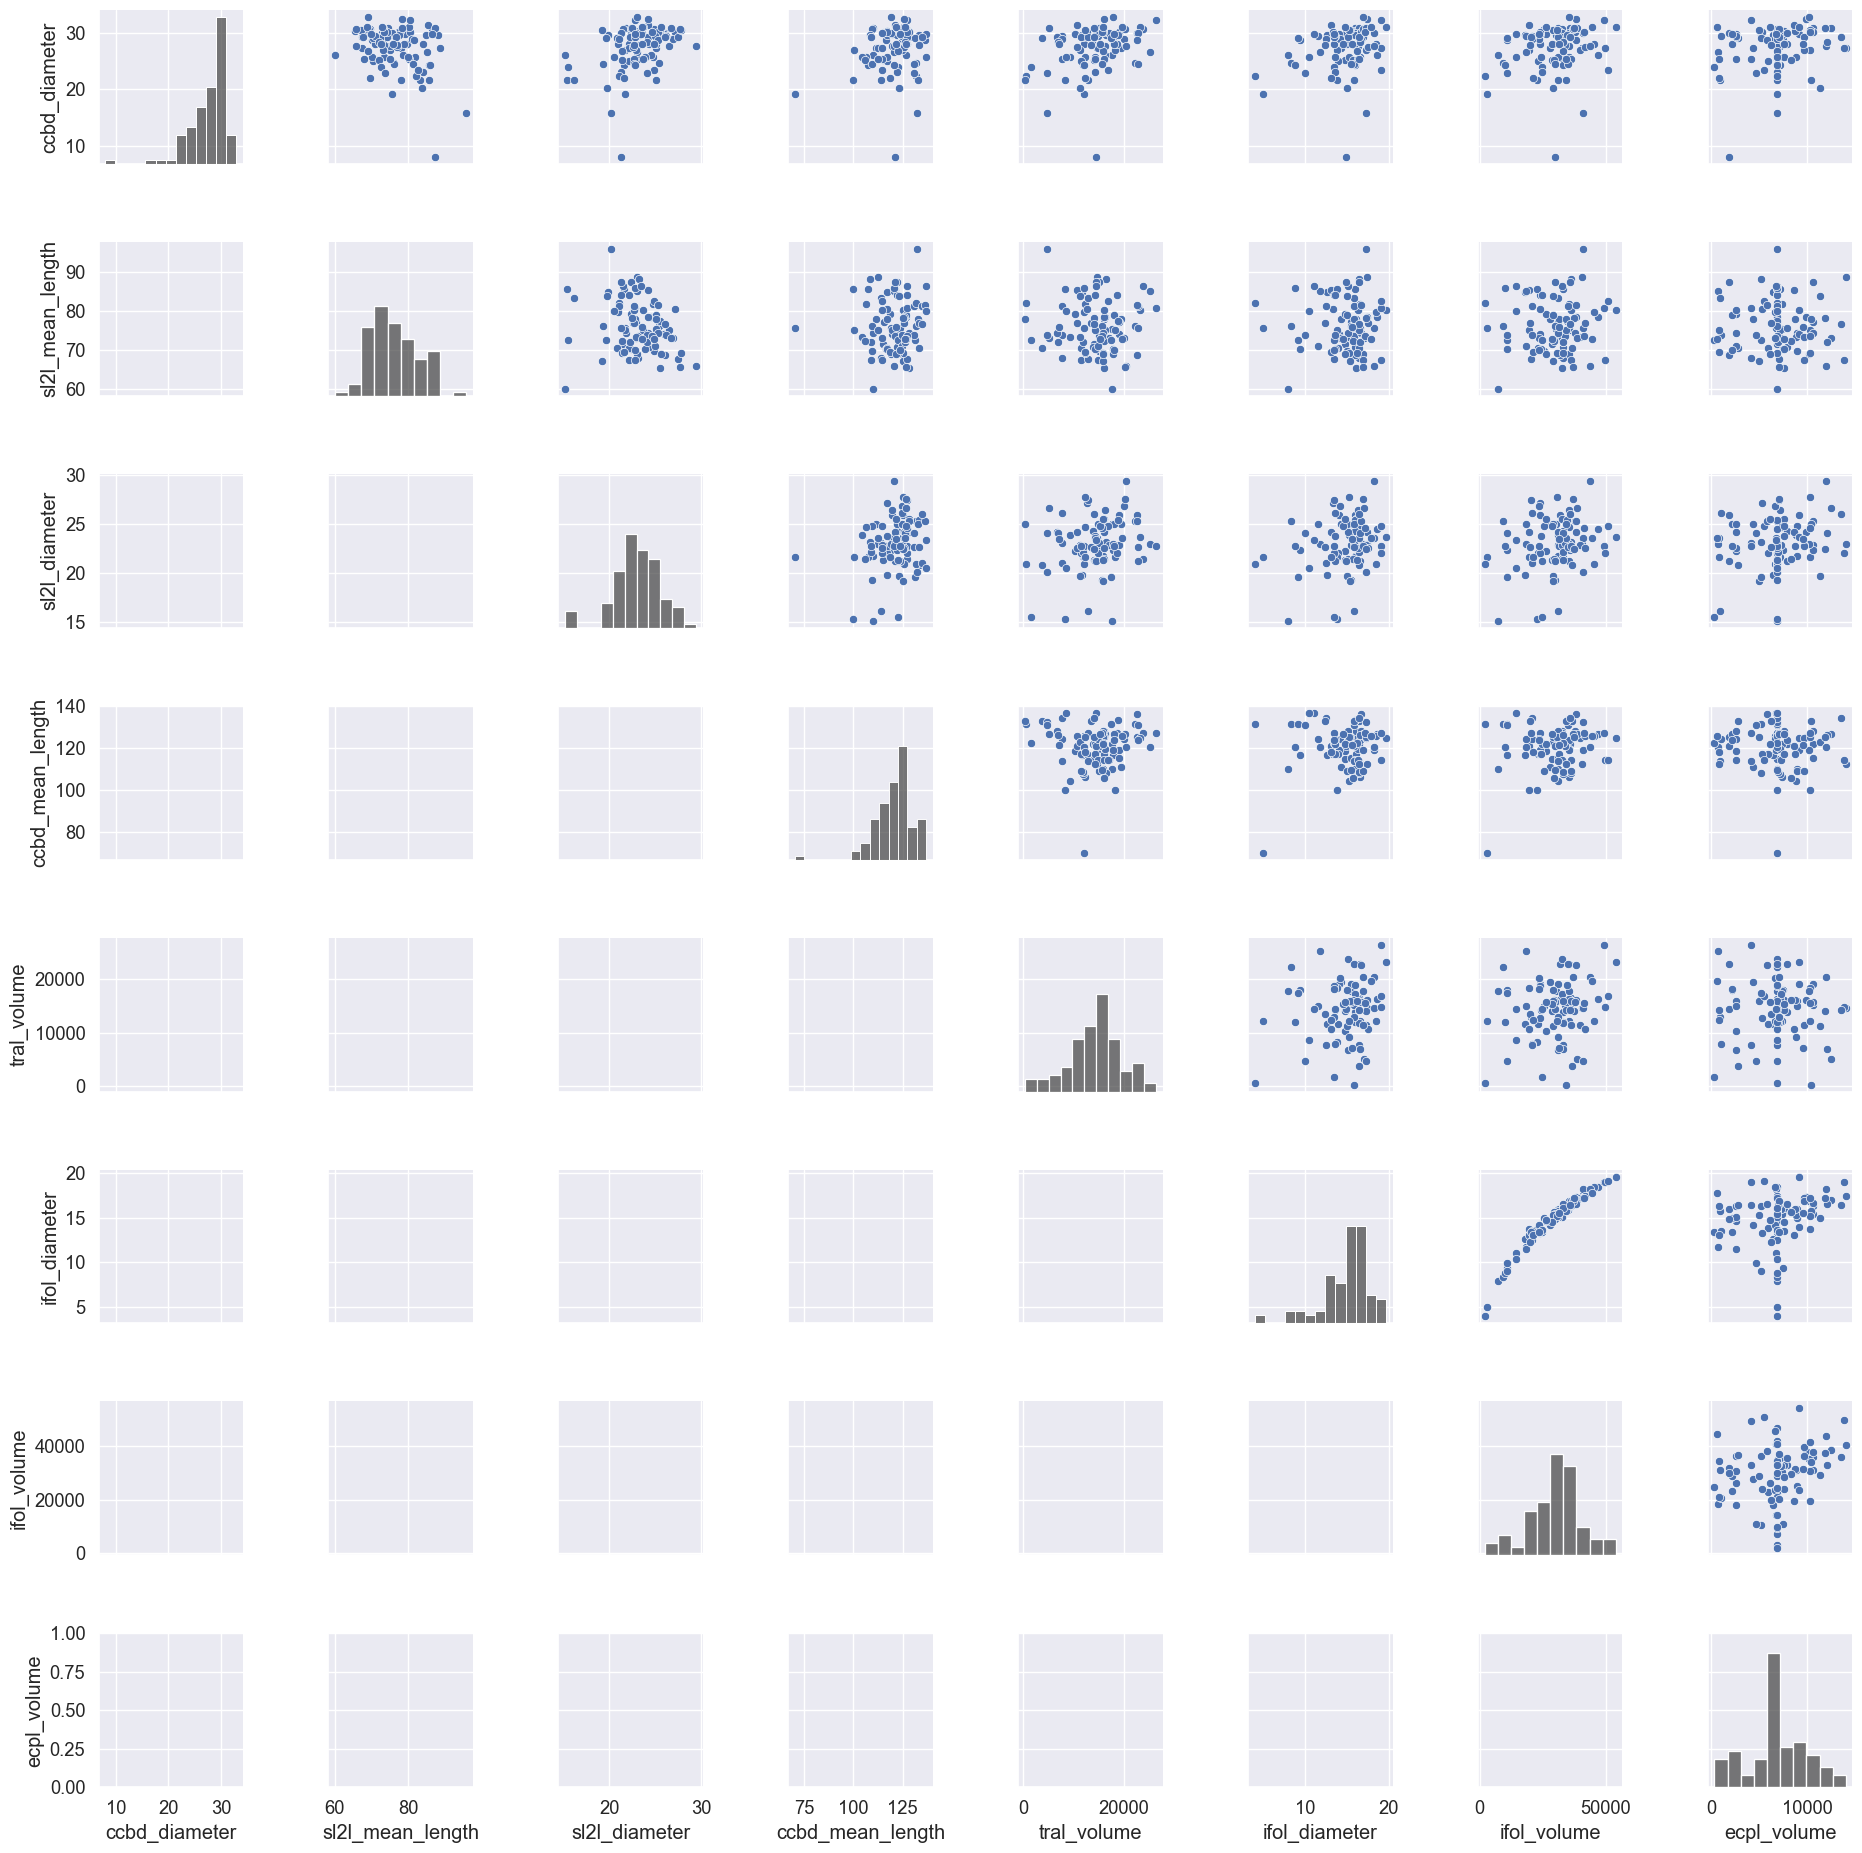

In [10]:
sns.set(font_scale=1.2)
grid = sns.PairGrid(df1[['ccbd_diameter', 'sl2l_mean_length',
 'sl2l_diameter', 'ccbd_mean_length', 'tral_volume', 
 'ifol_diameter', 'ifol_volume', 'ecpl_volume']], layout_pad=3)
grid.map_diag(sns.histplot, hue=None, color=".3")
grid.map_upper(sns.scatterplot)

In [11]:
my_r = df1[['ccbd_diameter', 'sl2l_mean_length',
 'sl2l_diameter', 'ccbd_mean_length', 'tral_volume', 
 'ifol_diameter', 'ifol_volume', 'ecpl_volume']].corr(method="spearman")
print(my_r)

                  ccbd_diameter  sl2l_mean_length  sl2l_diameter   
ccbd_diameter          1.000000         -0.196717       0.377808  \
sl2l_mean_length      -0.196717          1.000000      -0.231321   
sl2l_diameter          0.377808         -0.231321       1.000000   
ccbd_mean_length       0.192106          0.069825       0.200855   
tral_volume            0.347254         -0.050489       0.231329   
ifol_diameter          0.265423         -0.027170       0.185499   
ifol_volume            0.230670          0.032881       0.192336   
ecpl_volume            0.213806         -0.085315       0.170337   

                  ccbd_mean_length  tral_volume  ifol_diameter  ifol_volume   
ccbd_diameter             0.192106     0.347254       0.265423     0.230670  \
sl2l_mean_length          0.069825    -0.050489      -0.027170     0.032881   
sl2l_diameter             0.200855     0.231329       0.185499     0.192336   
ccbd_mean_length          1.000000    -0.002075       0.001614     0.06

In [26]:
estudio = df1[df1['label'] == 0]

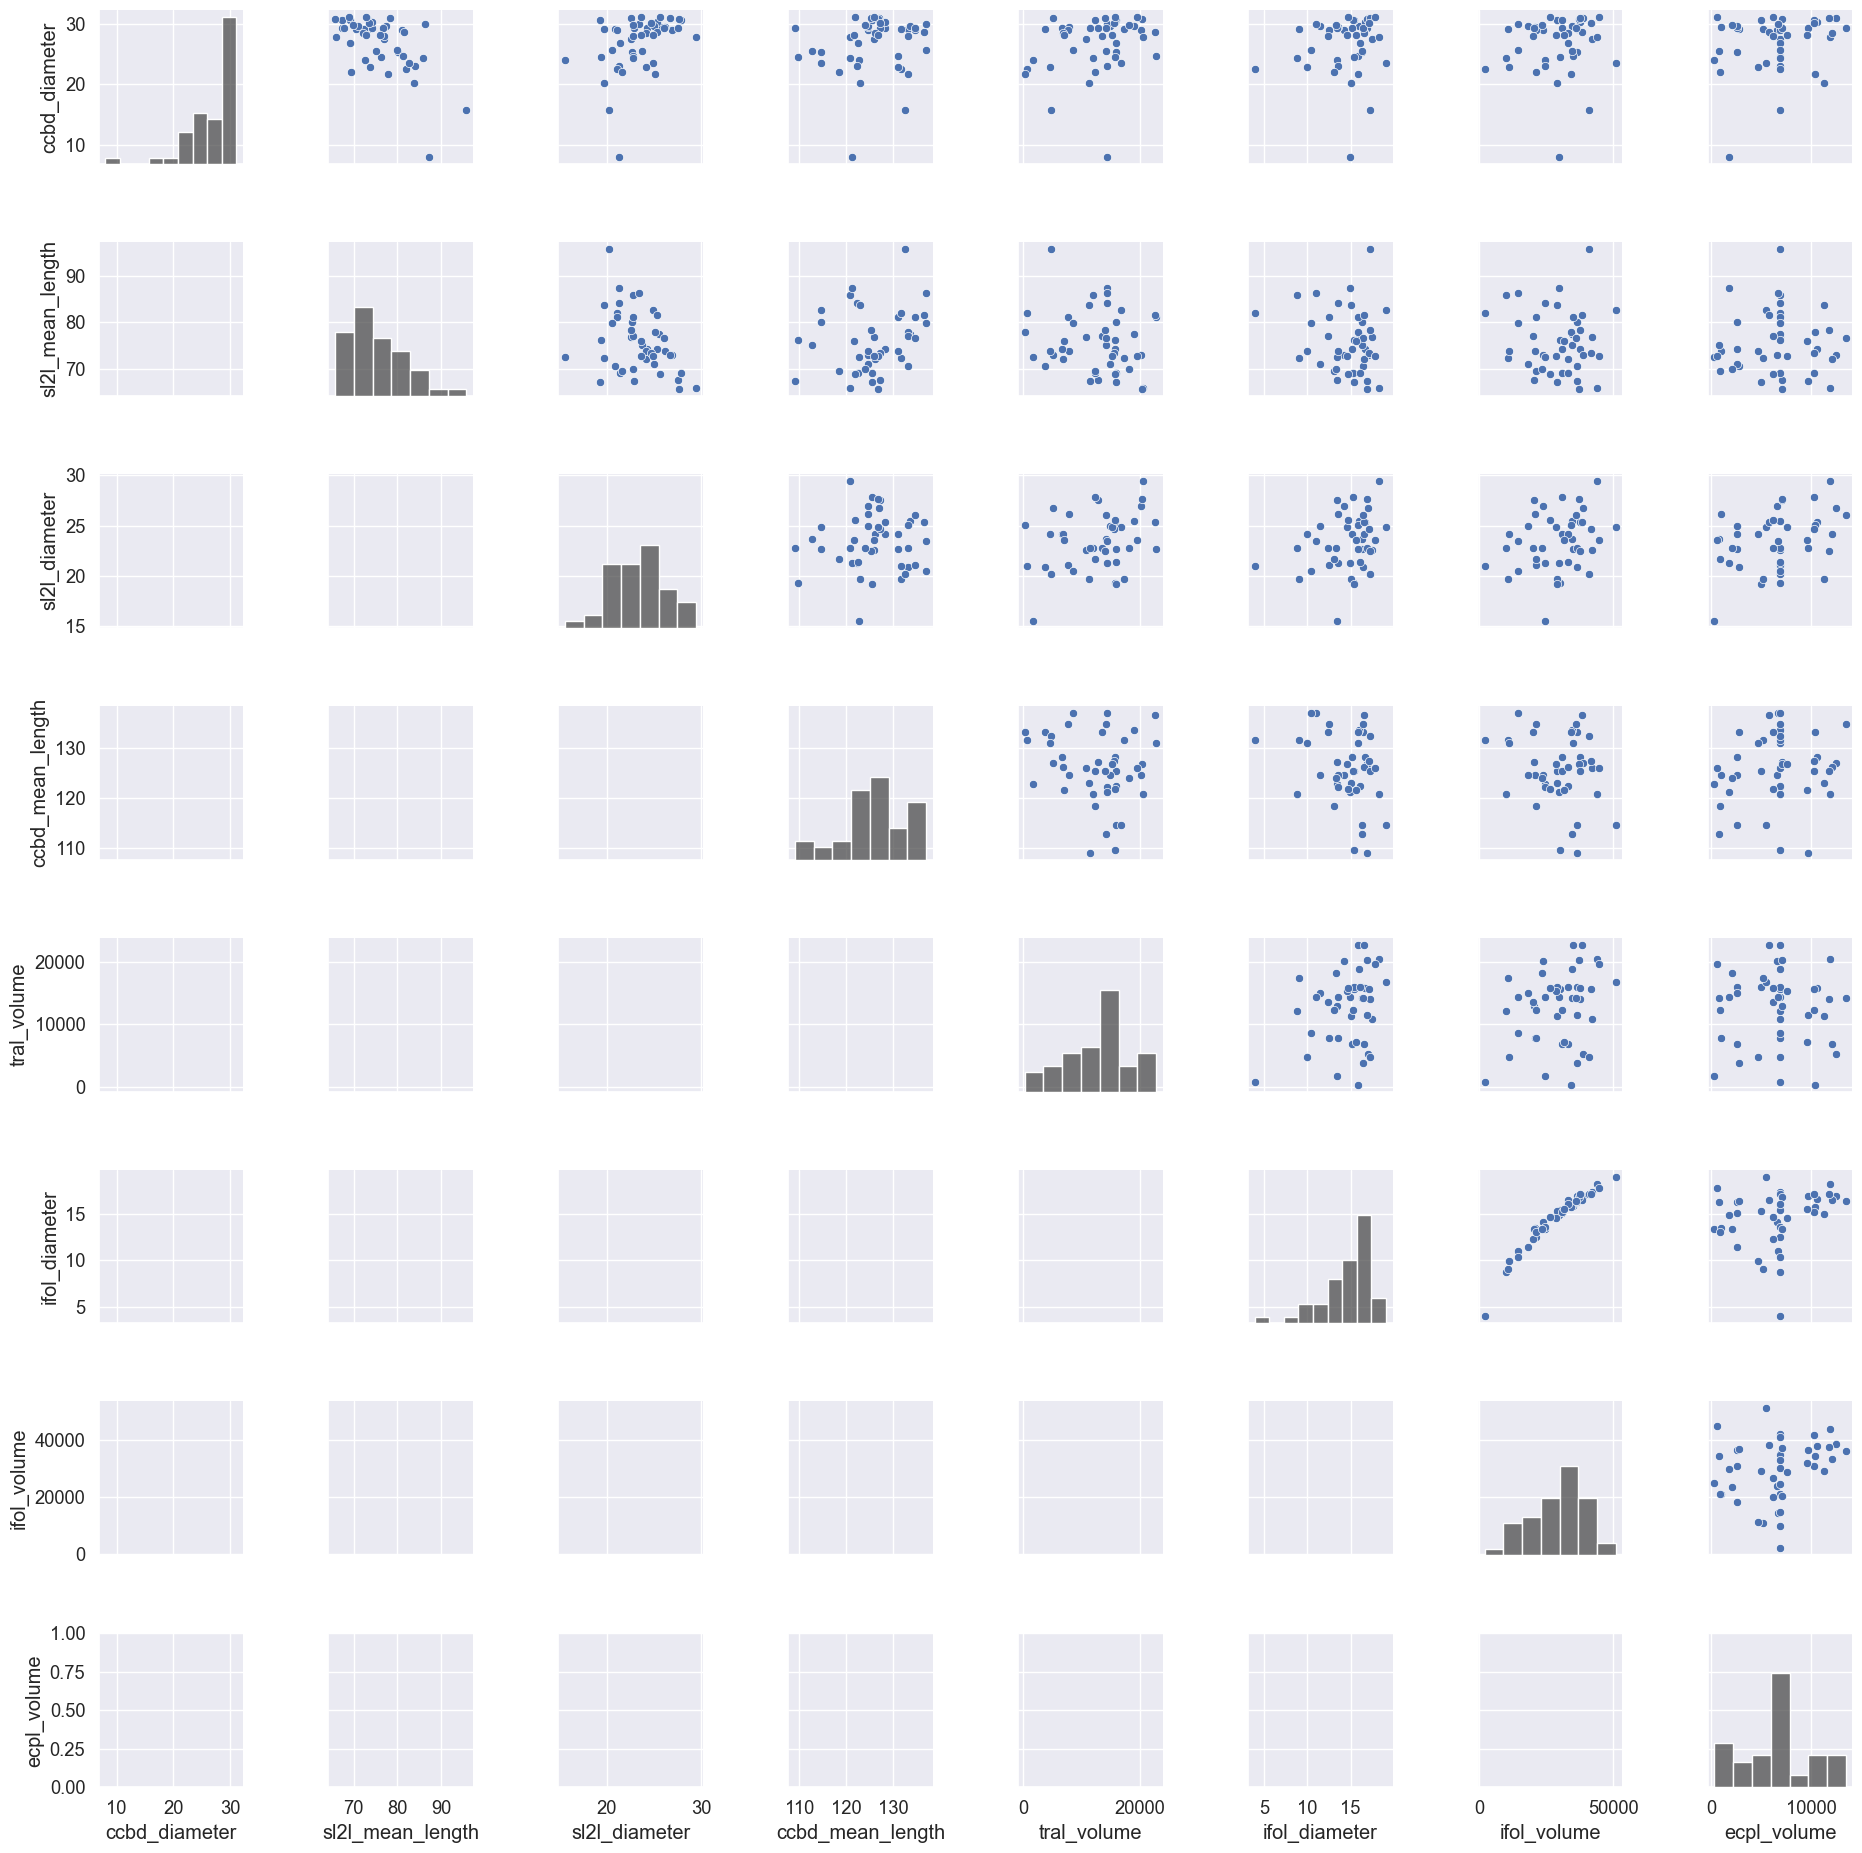

In [27]:
sns.set(font_scale=1.2)
grid = sns.PairGrid(estudio[['ccbd_diameter', 'sl2l_mean_length',
 'sl2l_diameter', 'ccbd_mean_length', 'tral_volume', 
 'ifol_diameter', 'ifol_volume', 'ecpl_volume']], layout_pad=3)
grid.map_diag(sns.histplot, hue=None, color=".3")
grid.map_upper(sns.scatterplot)

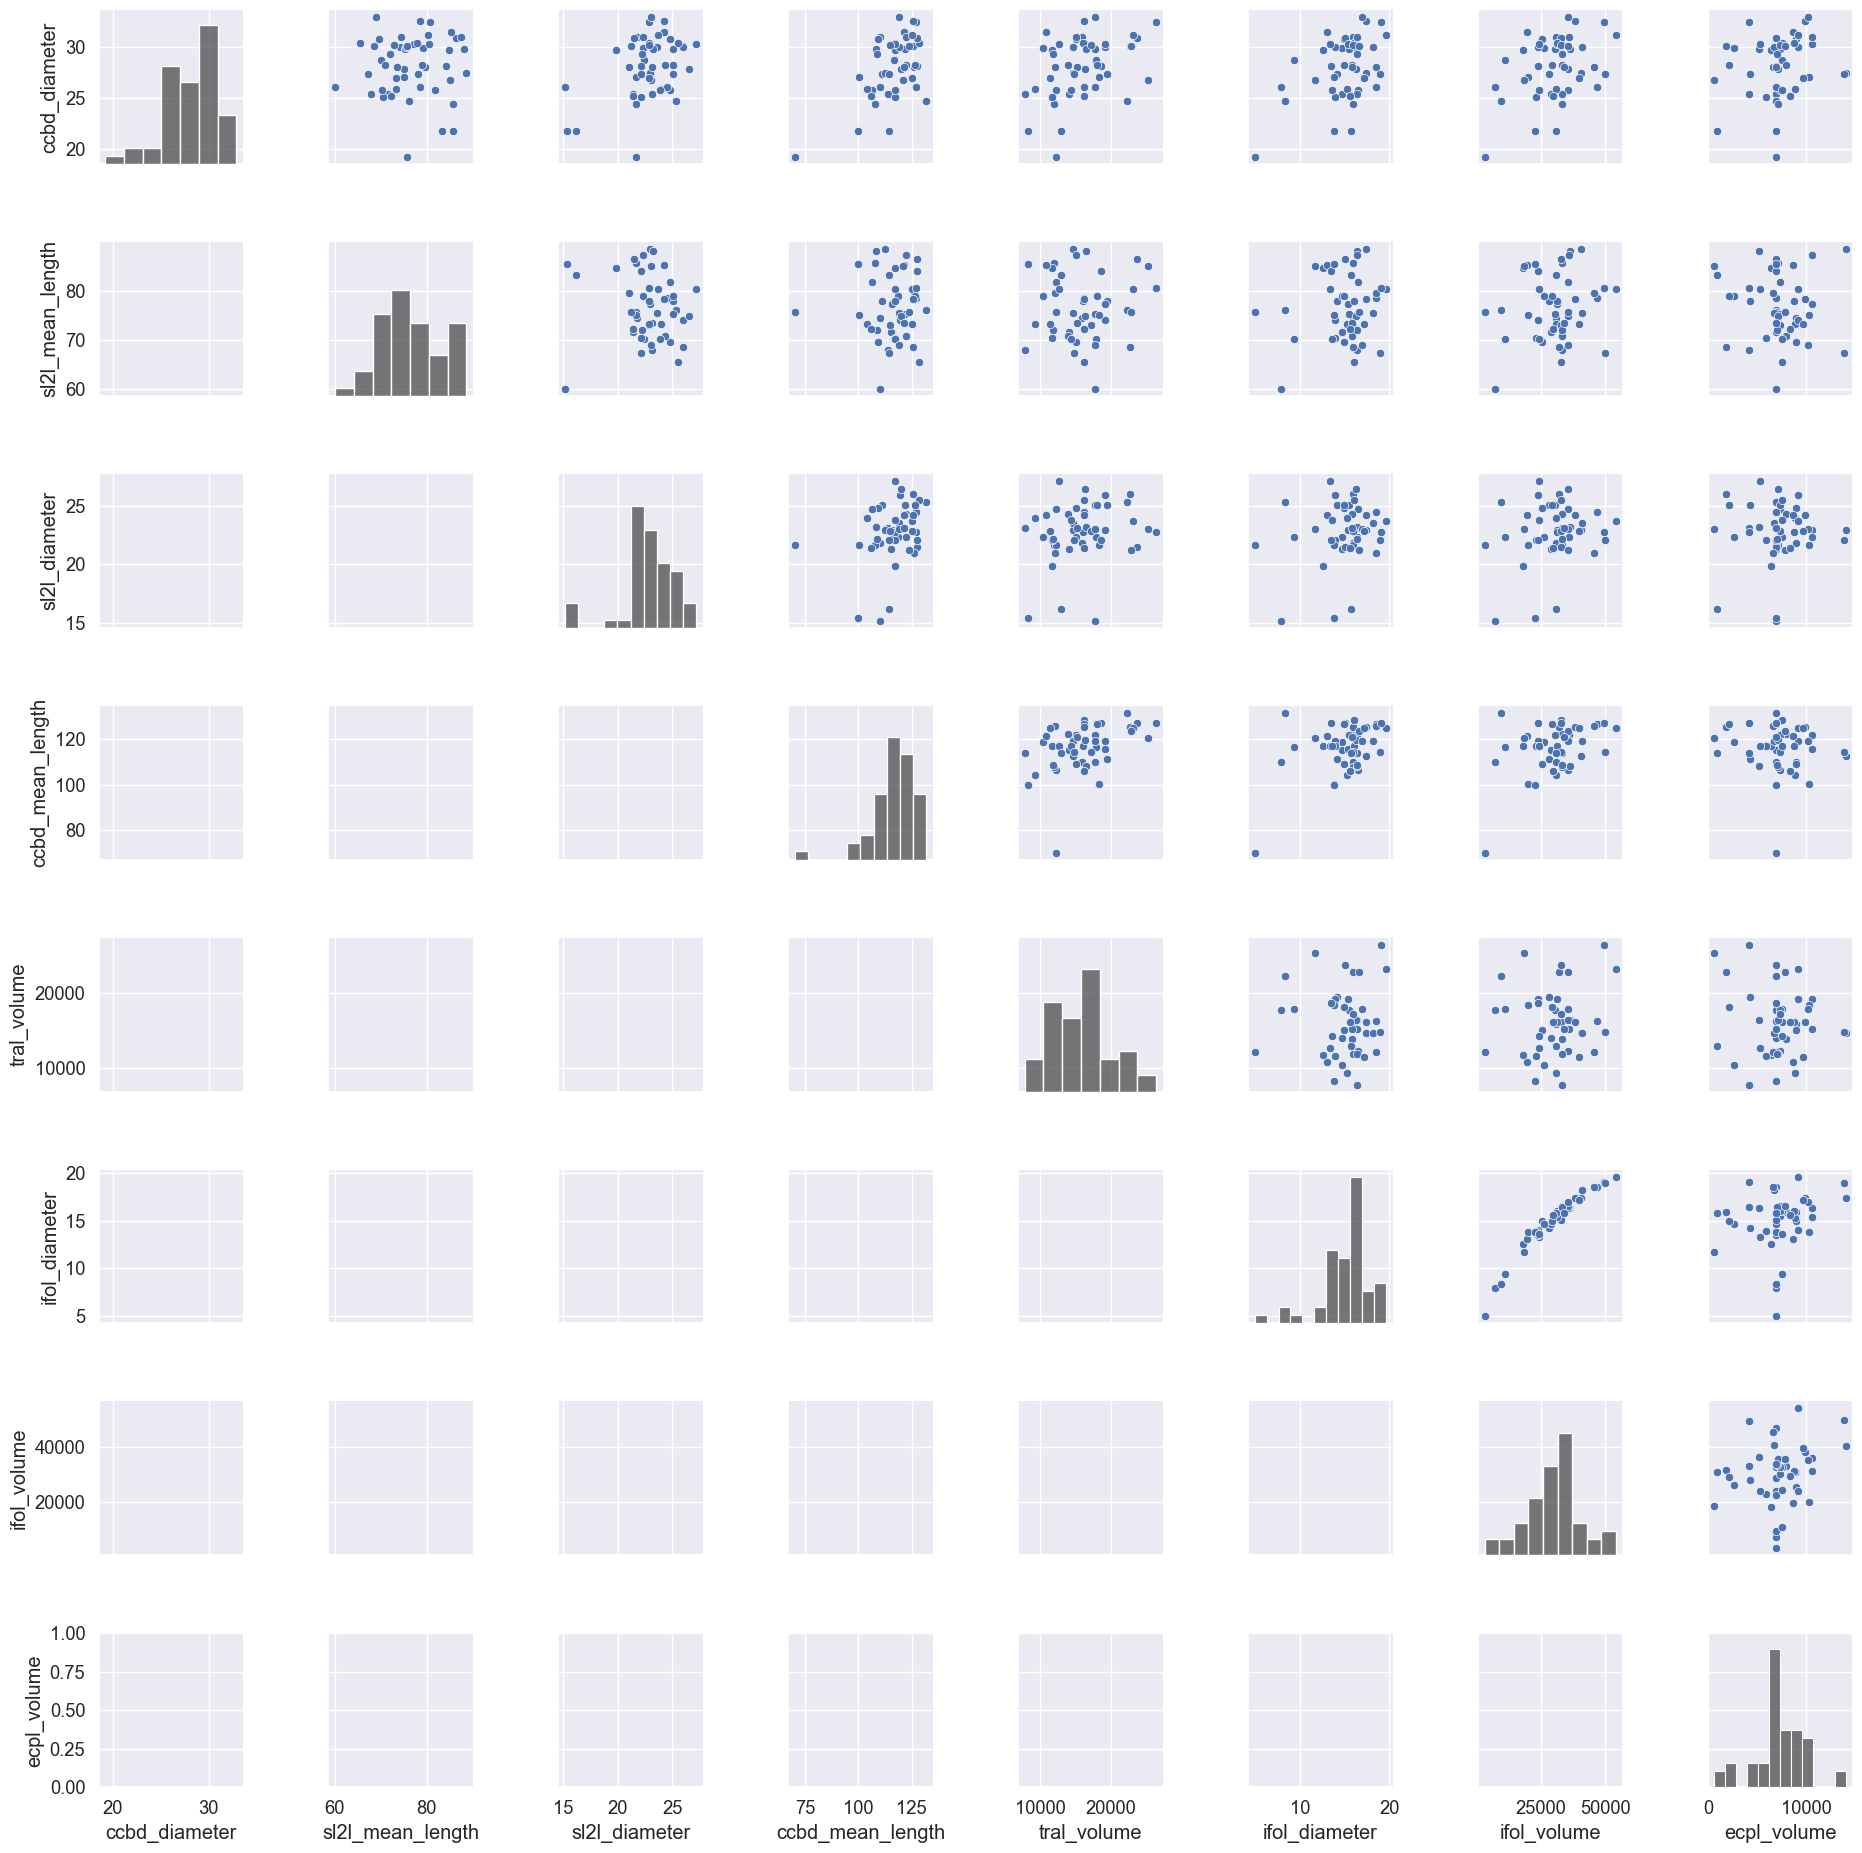

In [29]:
control = df1[df1['label'] == 1]
sns.set(font_scale=1.2)
grid = sns.PairGrid(control[['ccbd_diameter', 'sl2l_mean_length',
 'sl2l_diameter', 'ccbd_mean_length', 'tral_volume', 
 'ifol_diameter', 'ifol_volume', 'ecpl_volume']], layout_pad=3)
grid.map_diag(sns.histplot, hue=None, color=".3")
grid.map_upper(sns.scatterplot)

In [31]:
df1.ecpl_volume.describe()

count       96.000000
mean      6884.019684
std       3135.855748
min        315.327000
25%       5450.887500
50%       6884.019684
75%       8867.340000
max      14015.400000
Name: ecpl_volume, dtype: float64

<Axes: >

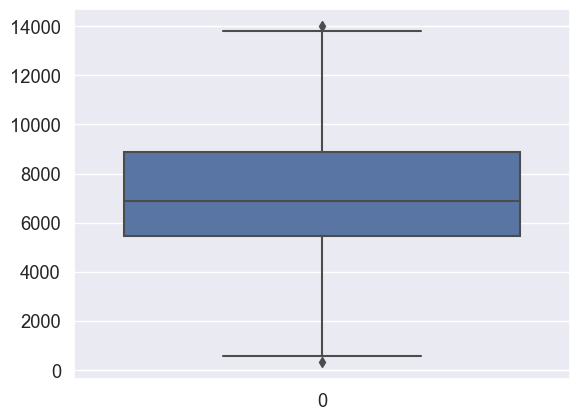

In [32]:
sns.boxplot(df1.ecpl_volume)